In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [81]:
df = pd.read_csv('diabetes.csv')[['Glucose', 'Insulin']]

df['Glucose'] = df['Glucose'] / 300 + 0.001
df['Insulin'] = df['Insulin'] / 900 + 0.001

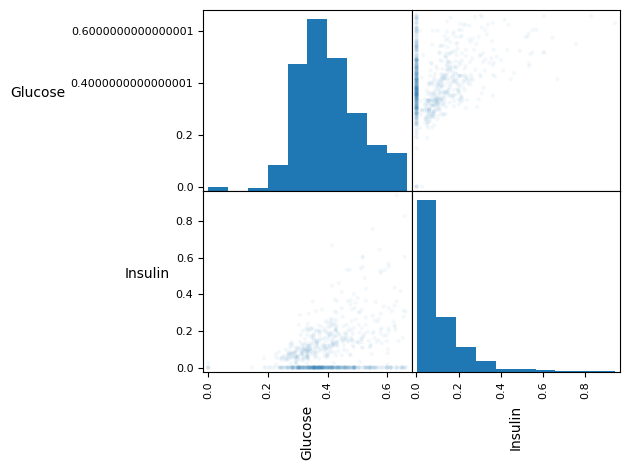

In [91]:
axes = pd.plotting.scatter_matrix(df, alpha=.05)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [83]:
n = len(df)

n_glucose = len(df['Glucose'])
n_insulin = len(df['Insulin'])

avg_ln_glucose = 1 / n_glucose * sum(np.log(gl_val) for gl_val in df['Glucose'])
avg_ln_insulin = 1 / n_insulin * sum(np.log(ins_val) for ins_val in df['Insulin'])

S_2_glucose = 1 / n_glucose * sum((np.log(gl_val) - avg_ln_glucose) ** 2 for gl_val in df['Glucose'])
S_2_insulin = 1 / n_insulin * sum((np.log(ins_val) - avg_ln_insulin) ** 2 for ins_val in df['Insulin'])

beta_ = (S_2_glucose / S_2_insulin) ** .5
alpha_ = np.exp(avg_ln_glucose - beta_ * avg_ln_insulin)

0.4713541666666667
0.08318058918201209


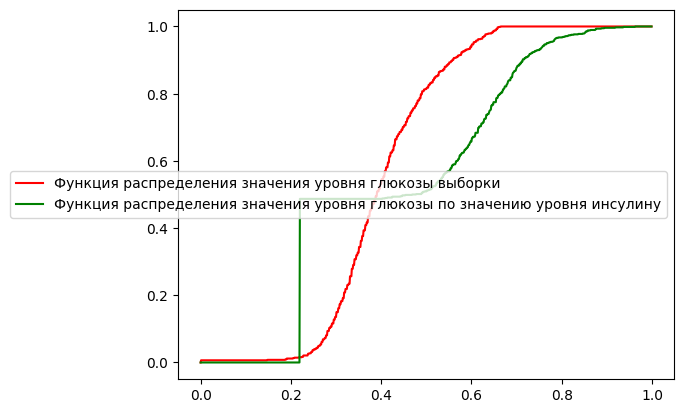

In [84]:
fact_distribution_glucose = lambda x: sum(df['Glucose'] <= x) / len(df)
pred_distribution_glucose = lambda x: sum((alpha_ * df['Insulin'] ** beta_) <= x) / len(df)

x = np.arange(0, 1, 0.001)

plt.plot(x, [fact_distribution_glucose(i) for i in x], color='red', label='Функция распределения значения уровня глюкозы выборки')
plt.plot(x, [pred_distribution_glucose(i) for i in x], color='green', label='Функция распределения значения уровня глюкозы по значению уровня инсулину')

print(max([abs(fact_distribution_glucose(i) - pred_distribution_glucose(i)) for i in x]))
print(1.63 * ((n_glucose + n_insulin) / (n_glucose * n_insulin)) ** .5)

plt.legend()
plt.show()

In [85]:
alpha_, beta_

(0.9756660200706704, 0.21566905183825688)

In [86]:
from collections import Counter

<Axes: ylabel='Density'>

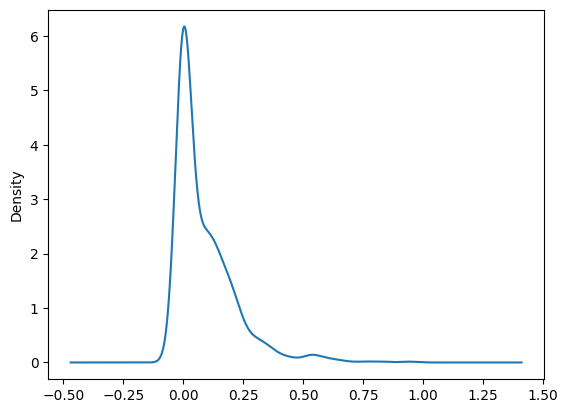

In [90]:
s = pd.Series(df['Insulin'])
s.plot.kde()